Code to generate inter-subject distance matrices based on the spatial pattern similarity of the beta maps derived from the GLM analysis.

In [1]:
%matplotlib inline
import os, glob, warnings, sys
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltools.data import Brain_Data
from nltools.stats import one_sample_permutation, two_sample_permutation, correlation_permutation
import seaborn as sns
from nltools.stats import threshold
from nltools.mask import expand_mask, collapse_mask
import scipy
from scipy.stats import pearsonr,spearmanr
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

base_dir = '/project/3014018.02/analysis_mri/DataSharingCollection/'

### Expand Mask

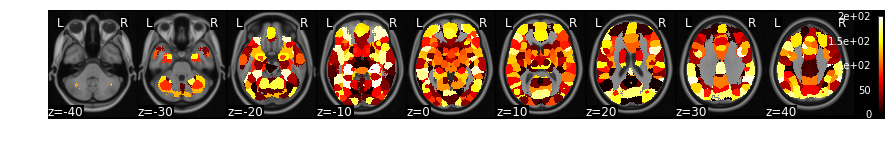

In [2]:
n_roi = 200
roi = Brain_Data(os.path.join(base_dir,'Data/6.Parcellation/whole_brain_cluster_labels_PCA=100_k=%s.nii.gz' % n_roi))
roi.plot()
roi_x = expand_mask(roi)

### Create Distance Matrix - Loop over all multipliers and all ROIs

In [ ]:
metric = 'correlation'
screen = 'Mult' # 'Multiplier screen' is called 'decision screen' in paper
for cond in ['X2','X4','X6']:
    print cond
    data_out = Brain_Data()
    for sub in subNums:
        data_out = data_out.append(Brain_Data(glob.glob(os.path.join(base_dir,
                         'Data/5.fMRI-BetaMaps/p%i_%s%s*nii'%(sub,screen,cond)))).mean()) # Mean over both runs
    parcelDist = []
    for parcelInd,parcel in enumerate(roi_x):
        print parcelInd,
        curDist = data_out.apply_mask(parcel).distance(method=metric)
        parcelDist.append(curDist.data)
    brainDist = pd.DataFrame(parcelDist,index=range(len(roi_x))).T
    brainDist.to_csv(os.path.join(base_dir,
                  'Results/3.fMRI-ISRSA/BrainDist/BrainDist_%s_%s%s_roi%i.csv' % (metric,screen,cond,n_roi)),index=None)